In [1]:
import numpy as np 
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras_visualizer import visualizer
from keras import callbacks
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os

# load data

In [23]:
data_path = 'dataset/CK+48'
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-anger

Loaded the images of dataset-contempt

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise



(327, 48, 48)

# adding labels

In [10]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:45]=0      #45
labels[46:63]=1     #18
labels[64:122]=2    #59
labels[123:147]=3   #25
labels[148:216]=4   #69
labels[217:244]=5   #28
labels[245:327]=6   #83

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

# dividing into training and testing

In [37]:
Y = np_utils.to_categorical(labels, num_classes)

# x,y = shuffle(img_data,Y, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.30, shuffle=True, random_state=42)
# x_test = X_test
X_train = np.reshape(X_train, (X_train.shape[0], 48, 48, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 48, 48, 1))

print(Y.shape)
print(X_train.shape)
print(X_test.shape)

(327, 7)
(228, 48, 48, 1)
(99, 48, 48, 1)


# creating model

In [81]:
input_shape=(48,48,1)

model = Sequential()

model.add(Conv2D(6, (4, 4), input_shape = input_shape))
model.add(Activation('relu'))
model.add(Conv2D(16, (5, 5), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.7))
model.add(Dense(7, activation = 'softmax'))

model.summary()

visualizer(model, format='png')

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 45, 45, 6)         102       
_________________________________________________________________
activation_18 (Activation)   (None, 45, 45, 6)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 45, 45, 16)        2416      
_________________________________________________________________
activation_19 (Activation)   (None, 45, 45, 16)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 22, 22, 16)        0         
_________________________________________________________________
activation_20 (Activation)   (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 20, 20, 64)      

# training the model

In [82]:
filename='model_train_new.csv'
filepath = os.path.join("./emotion_detector_models/model_v6_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
# callbacks = [checkpoint]


csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
# checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [83]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'MeanSquaredError'])

In [84]:
model_info = model.fit(X_train, y_train, batch_size=7, epochs=50, validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/50
33/33 [==============================] - 3s 39ms/step - loss: 1.9114 - accuracy: 0.1492 - mean_squared_error: 0.1216 - val_loss: 1.8715 - val_accuracy: 0.2323 - val_mean_squared_error: 0.1193
Epoch 2/50
33/33 [==============================] - 1s 21ms/step - loss: 1.8649 - accuracy: 0.3220 - mean_squared_error: 0.1185 - val_loss: 1.8474 - val_accuracy: 0.3838 - val_mean_squared_error: 0.1182
Epoch 3/50
33/33 [==============================] - 1s 22ms/step - loss: 1.8482 - accuracy: 0.2677 - mean_squared_error: 0.1177 - val_loss: 1.8318 - val_accuracy: 0.3232 - val_mean_squared_error: 0.1129
Epoch 4/50
33/33 [==============================] - 1s 23ms/step - loss: 1.8673 - accuracy: 0.3584 - mean_squared_error: 0.1145 - val_loss: 1.5661 - val_accuracy: 0.4242 - val_mean_squared_error: 0.0983
Epoch 5/50
33/33 [==============================] - 1s 22ms/step - loss: 1.4028 - accuracy: 0.5038 - mean_squared_error: 0.0895 - val_loss: 1.2868 - val_accuracy: 0.6162 - val_mean_squared

In [88]:
model.save('my_model.hdf5')

# predict model

In [85]:
# evaluate the model
score = model.evaluate(X_train, y_train)
print('Accuracy (train): %.2f' % (score[1]*100))

score = model.evaluate(X_test, y_test)
print('Accuracy (test): %.2f' % (score[1]*100))

8/8 [==============================] - 0s 13ms/step - loss: 0.0111 - accuracy: 1.0000 - mean_squared_error: 4.0732e-04
Accuracy (train): 100.00
4/4 [==============================] - 0s 11ms/step - loss: 0.9502 - accuracy: 0.8182 - mean_squared_error: 0.0404
Accuracy (test): 81.82


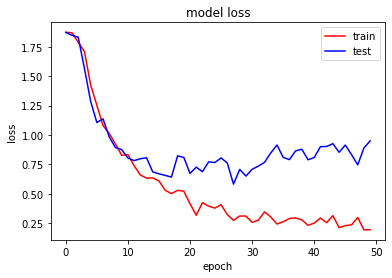

In [86]:
plt.plot(model_info.history['loss'], 'r', label='train')
plt.plot(model_info.history['val_loss'], 'b', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

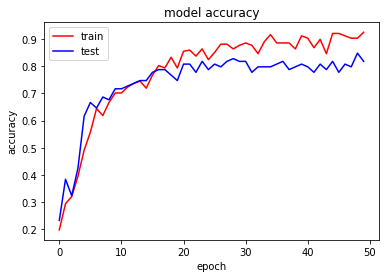

In [87]:
plt.plot(model_info.history['accuracy'], 'r', label='train')
plt.plot(model_info.history['val_accuracy'], 'b', label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

(1, 48, 48, 1)
[[4.3241221e-01 1.3854183e-03 1.5588730e-02 7.6638490e-02 2.8039996e-05
  4.6871677e-01 5.2303169e-03]]
[5]
[[0. 0. 0. 0. 0. 1. 0.]]


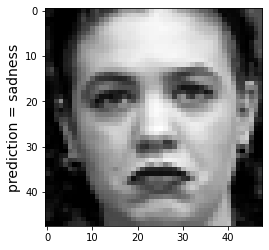

In [89]:
test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(np.argmax(model.predict(test_image), axis=-1))
print(y_test[0:1])

plt.imshow(test_image[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image), axis=-1)[0]), fontsize=14)
plt.show()

(1, 48, 48, 1)
[[0. 0. 0. 0. 0. 0. 1.]]
[6]
[[0. 0. 0. 0. 0. 1. 0.]]


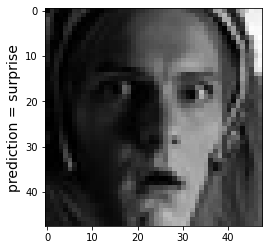

In [91]:
test_image = cv2.imread('test_images/surprise.jpg')
test_img_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image_resize = cv2.resize(test_img_gray,(48,48))
test_image_resize = np.reshape(test_image_resize, (1, 48, 48, 1))
print (test_image_resize.shape)

print(model.predict(test_image_resize))
print(np.argmax(model.predict(test_image_resize), axis=-1))
print(y_test[0:1])

plt.imshow(test_image_resize[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image_resize), axis=-1)[0]), fontsize=14)
plt.show()

(1, 48, 48, 1)
[[1.7039677e-14 1.0045696e-10 6.8707151e-09 1.0709258e-11 1.0000000e+00
  1.0714528e-15 5.6248612e-14]]
[4]
[[0. 0. 0. 0. 1. 0. 0.]]


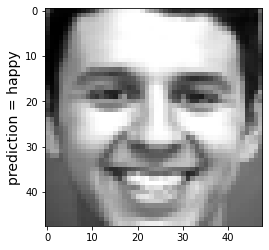

In [94]:
test_image = X_test[33:34]
print (test_image.shape)

print(model.predict(test_image))
print(np.argmax(model.predict(test_image), axis=-1))
print(y_test[33:34])

plt.imshow(test_image[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image), axis=-1)[0]), fontsize=14)
plt.show()